In [ ]:
%pip install sklearn-pandas
#color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique()))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from copy import deepcopy
from sklearn.ensemble import RandomForestClassifier

In [3]:
#df=pd.read_csv("ks-projects-201801.csv")
x_train=pd.read_csv("./data/preprocess-base-x-train.csv")
y_train=pd.read_csv("./data/preprocess-base-y-train.csv")
x_valid=pd.read_csv("./data/preprocess-base-x-valid.csv")
y_valid=pd.read_csv("./data/preprocess-base-y-valid.csv")

In [4]:
def one_hot_df(df,one_hot_cols,drop_cols):
    dfret=deepcopy(df)
    dfret=pd.get_dummies(dfret,columns=one_hot_cols).drop(columns=drop_cols)
    return dfret

one_hot_cols=['main_category','launched_month','deadline_month']
drop_cols=['category','Unnamed: 0']

x_train=one_hot_df(x_train, one_hot_cols,drop_cols)
x_valid=one_hot_df(x_valid,one_hot_cols,drop_cols)


Y_train=np.array(y_train['success'])
Y_valid=np.array(y_valid['success'])
feature_list=list(x_train.columns)
X_train=np.array(x_train)
X_valid=np.array(x_valid)


In [5]:
print(len(feature_list))
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

41
(249956, 41)
(249956,)
(33249, 41)
(33249,)


In [6]:
rfc=RandomForestClassifier(n_estimators=4096, random_state=42, max_depth=None, n_jobs=4) #class_weight="balanced" or "balanced_subsample"

In [7]:
rfc.fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
predictions=rfc.predict(X_vsmall)
errors=abs(predictions^Y_vsmall)
print('Mean Absolute Error:', round(np.mean(errors), 4))

In [8]:
x=1
estimators=[1]
for i in range(12):
    x*=2
    estimators+=[x]
    
print(estimators)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]


In [10]:
params=[]
predictions=[]
for i in range(len(estimators)):
    rfc=RandomForestClassifier(n_estimators=estimators[i], random_state=42, max_depth=None, n_jobs=4) #class_weight="balanced" or "balanced_subsample")
    rfc.fit(X_train,Y_train)
    p=rfc.predict(X_valid)
    print(p)
    predictions.append(p)
    params.append(rfc.get_params())

[ True  True False ... False False  True]
[ True False False ... False False False]
[ True False False ... False False False]
[False  True  True ... False False  True]
[False  True  True ... False False  True]
[False  True  True ... False False  True]
[False  True  True ... False False  True]
[False  True  True ... False False  True]
[False  True  True ... False False  True]
[False  True  True ... False  True  True]
[False  True  True ... False  True  True]
[False  True  True ... False  True  True]


MemoryError: could not allocate 14680064 bytes

In [11]:
accuracies=[]
mean_errors=[]
for i in predictions:
    errors=abs(predictions^Y_valid)
    mean_errors.append(round(np.mean(errors), 5))
    accuracies.append(1-round(np.mean(errors), 5))

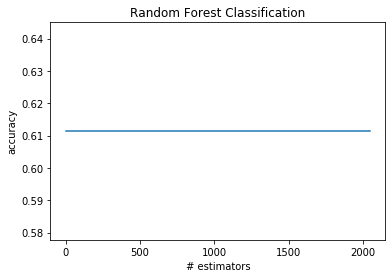

In [15]:
plt.plot(estimators[:-1],accuracies)
#plt.legend()
plt.title('Random Forest Classification')
plt.ylabel('accuracy')
plt.xlabel('# estimators')
plt.show()